In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np
from scipy.stats import norm
import matplotlib.ticker as mtick


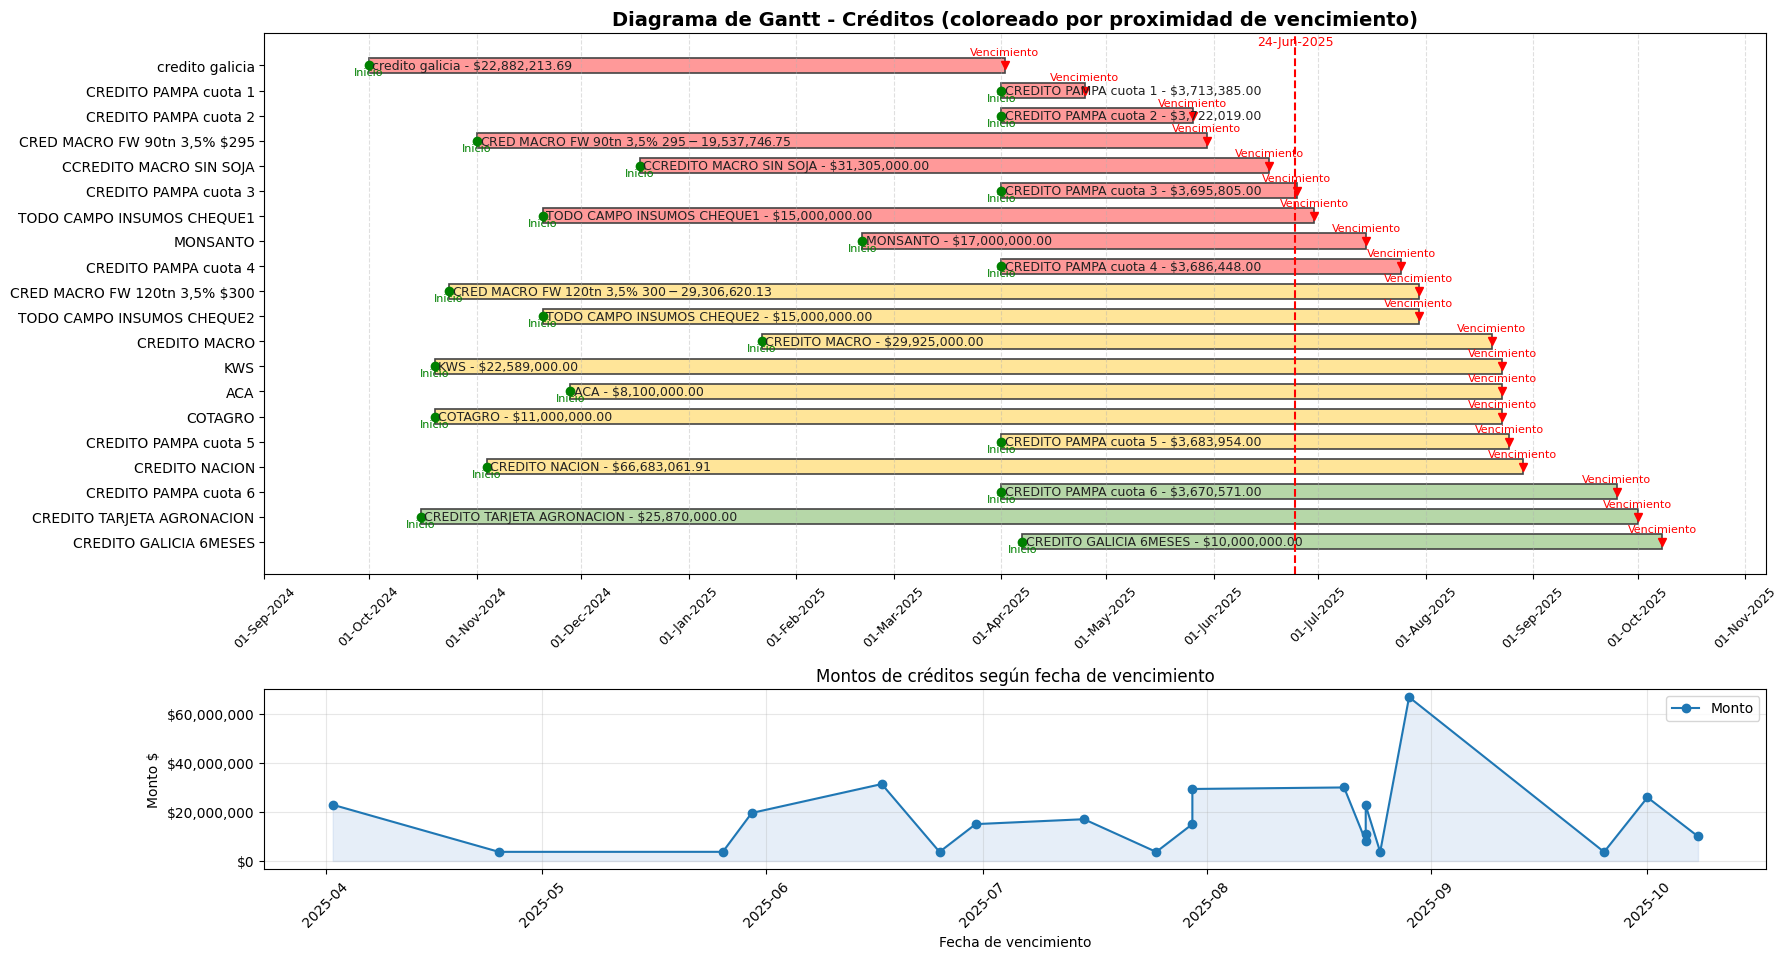

In [2]:

# Lista de tareas con nombre, inicio, fin y monto
tareas = [
    {"tarea": "credito galicia", "inicio": "2024-10-01", "fin": "2025-04-02", "monto":  22882213.69},
    {"tarea": "CRED MACRO FW 120tn 3,5% $300", "inicio": "2024-10-24", "fin": "2025-07-30", "monto":  29306620.13},
    {"tarea": "CRED MACRO FW 90tn 3,5% $295", "inicio": "2024-11-01", "fin": "2025-05-30", "monto":  19537746.75},
    {"tarea": "CREDITO NACION", "inicio": "2024-11-04", "fin": "2025-08-29", "monto":  66683061.91},
    {"tarea": "CREDITO TARJETA AGRONACION", "inicio": "2024-10-16", "fin": "2025-10-01", "monto":  25870000},
    {"tarea": "CCREDITO MACRO SIN SOJA", "inicio": "2024-12-18", "fin": "2025-06-17", "monto": 31305000},
    {"tarea": "CREDITO MACRO", "inicio": "2025-01-22", "fin": "2025-08-20", "monto":  29925000},
    {"tarea": "CREDITO PAMPA cuota 1", "inicio": "2025-04-01", "fin": "2025-04-25", "monto":  3713385},
    {"tarea": "CREDITO PAMPA cuota 2", "inicio": "2025-04-01", "fin": "2025-05-26", "monto":  3722019},
    {"tarea": "CREDITO PAMPA cuota 3", "inicio": "2025-04-01", "fin": "2025-06-25", "monto":  3695805},
    {"tarea": "CREDITO PAMPA cuota 4", "inicio": "2025-04-01", "fin": "2025-07-25", "monto":  3686448},
    {"tarea": "CREDITO PAMPA cuota 5", "inicio": "2025-04-01", "fin": "2025-08-25", "monto":  3683954},
    {"tarea": "CREDITO PAMPA cuota 6", "inicio": "2025-04-01", "fin": "2025-09-25", "monto":  3670571},
    {"tarea": "CREDITO GALICIA 6MESES", "inicio": "2025-04-07", "fin": "2025-10-08", "monto": 10000000},
    {"tarea":"TODO CAMPO INSUMOS CHEQUE1", "inicio": "2024-11-20", "fin": "2025-06-30", "monto": 15000000},
    {"tarea":"TODO CAMPO INSUMOS CHEQUE2", "inicio": "2024-11-20", "fin": "2025-07-30", "monto": 15000000},
    {"tarea":"KWS", "inicio": "2024-10-20", "fin": "2025-08-23", "monto": 22589000},
    {"tarea":"ACA", "inicio": "2024-11-28", "fin": "2025-08-23", "monto": 8100000},
    {"tarea":"COTAGRO", "inicio": "2024-10-20", "fin": "2025-08-23", "monto": 11000000},
    {"tarea":"MONSANTO", "inicio": "2025-02-20", "fin": "2025-07-15", "monto": 17000000}
]


# Procesamiento de fechas y colores según vencimiento
hoy = datetime.today()
for tarea in tareas:
    tarea["inicio_dt"] = datetime.strptime(tarea["inicio"], "%Y-%m-%d")
    tarea["fin_dt"] = datetime.strptime(tarea["fin"], "%Y-%m-%d")
    tarea["duracion"] = (tarea["fin_dt"] - tarea["inicio_dt"]).days
    dias_restantes = (tarea["fin_dt"] - hoy).days
    if dias_restantes < 90:
        tarea["color"] = "#ffb3b3"
    elif dias_restantes < 180:
        tarea["color"] = "#ffe599"
    else:
        tarea["color"] = "#b6d7a8"

tareas.sort(key=lambda x: x["fin_dt"])

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10), gridspec_kw={'height_ratios': [3, 1]})
fig.patch.set_facecolor('#ffffff')

# Colorear según fecha de vencimiento
for i, tarea in enumerate(tareas):
    color = "#ff9999" if (tarea["fin_dt"] - hoy).days <= 30 else "#b6d7a8"
    if tarea["inicio"] == tarea["fin"]:  # Cheque de un día
        color = "#c9daf8"  # Azul clarito para compromisos puntuales

hoy = datetime.today()
for i, tarea in enumerate(tareas):
    dias_restantes = (tarea["fin_dt"] - hoy).days
    if dias_restantes <= 30:
        color = '#ff9999'  # rojo claro
    elif dias_restantes <= 90:
        color = '#ffe599'  # amarillo claro
    else:
        color = '#b6d7a8'  # verde claro

    # Barra horizontal
    ax1.barh(
        y=i,
        width=tarea["duracion"],
        left=tarea["inicio_dt"],
        height=0.6,
        align='center',
        color=color,
        edgecolor='#444',
        linewidth=1.2
    )

    # Etiqueta de tarea + monto
    ax1.text(
        tarea["inicio_dt"] + timedelta(days=1),
        i,
        f"{tarea['tarea']} - ${tarea['monto']:,.2f}",
        va='center',
        ha='left',
        fontsize=9,
        color='#222'
    )

    # Marca de inicio
    ax1.plot(tarea["inicio_dt"], i, marker='o', color='green', markersize=6)
    ax1.text(tarea["inicio_dt"], i + 0.4, "Inicio", color='green', fontsize=8, ha='center')

    # Marca de vencimiento
    ax1.plot(tarea["fin_dt"], i, marker='v', color='red', markersize=6)
    ax1.text(tarea["fin_dt"], i - 0.4, "Vencimiento", color='red', fontsize=8, ha='center')



# Línea de hoy
ax1.axvline(hoy, color='red', linestyle='--', linewidth=1.5, label='Hoy')
ax1.text(hoy, -0.8, hoy.strftime("%d-%b-%Y"), color='red', ha='center', fontsize=9)

# Ejes y formato
ax1.set_yticks(range(len(tareas)))
ax1.set_yticklabels([t["tarea"] for t in tareas])
ax1.invert_yaxis()
fecha_inicio_grafico = datetime(2024, 9, 1)
fecha_fin_grafico = max(t["fin_dt"] for t in tareas) + timedelta(days=30)
ax1.set_xlim(fecha_inicio_grafico, fecha_fin_grafico)
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
ax1.tick_params(axis='x', rotation=45, labelsize=9)
ax1.grid(True, which='major', axis='x', linestyle='--', alpha=0.4)
ax1.set_title("Diagrama de Gantt - Créditos (coloreado por proximidad de vencimiento)", fontsize=14, weight='bold')

# Subplot: Monto por fecha de vencimiento
fechas_vencimiento = [t["fin_dt"] for t in tareas]
montos = [t["monto"] for t in tareas]

# Ordenar por fecha
fechas_ordenadas, montos_ordenados = zip(*sorted(zip(fechas_vencimiento, montos)))

ax2.plot(fechas_ordenadas, montos_ordenados, 'o-', color='#1f77b4', label='Monto')
ax2.fill_between(fechas_ordenadas, montos_ordenados, color='#aec7e8', alpha=0.3)


ax2.set_title("Montos de créditos según fecha de vencimiento", fontsize=12)
ax2.set_xlabel("Fecha de vencimiento")
ax2.set_ylabel("Monto $")
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)
ax2.legend()


plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

📊 Sumatoria mensual de montos por vencimiento:
mes_pago
2025-05-01     4523733.55
2025-06-01    51183760.14
2025-07-01    39534751.08
2025-08-01     9270746.33
Name: monto, dtype: float64


C:\Users\Kevin\AppData\Local\Temp\ipykernel_2636\3889578544.py:124: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  plt.tight_layout()
C:\Users\Kevin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


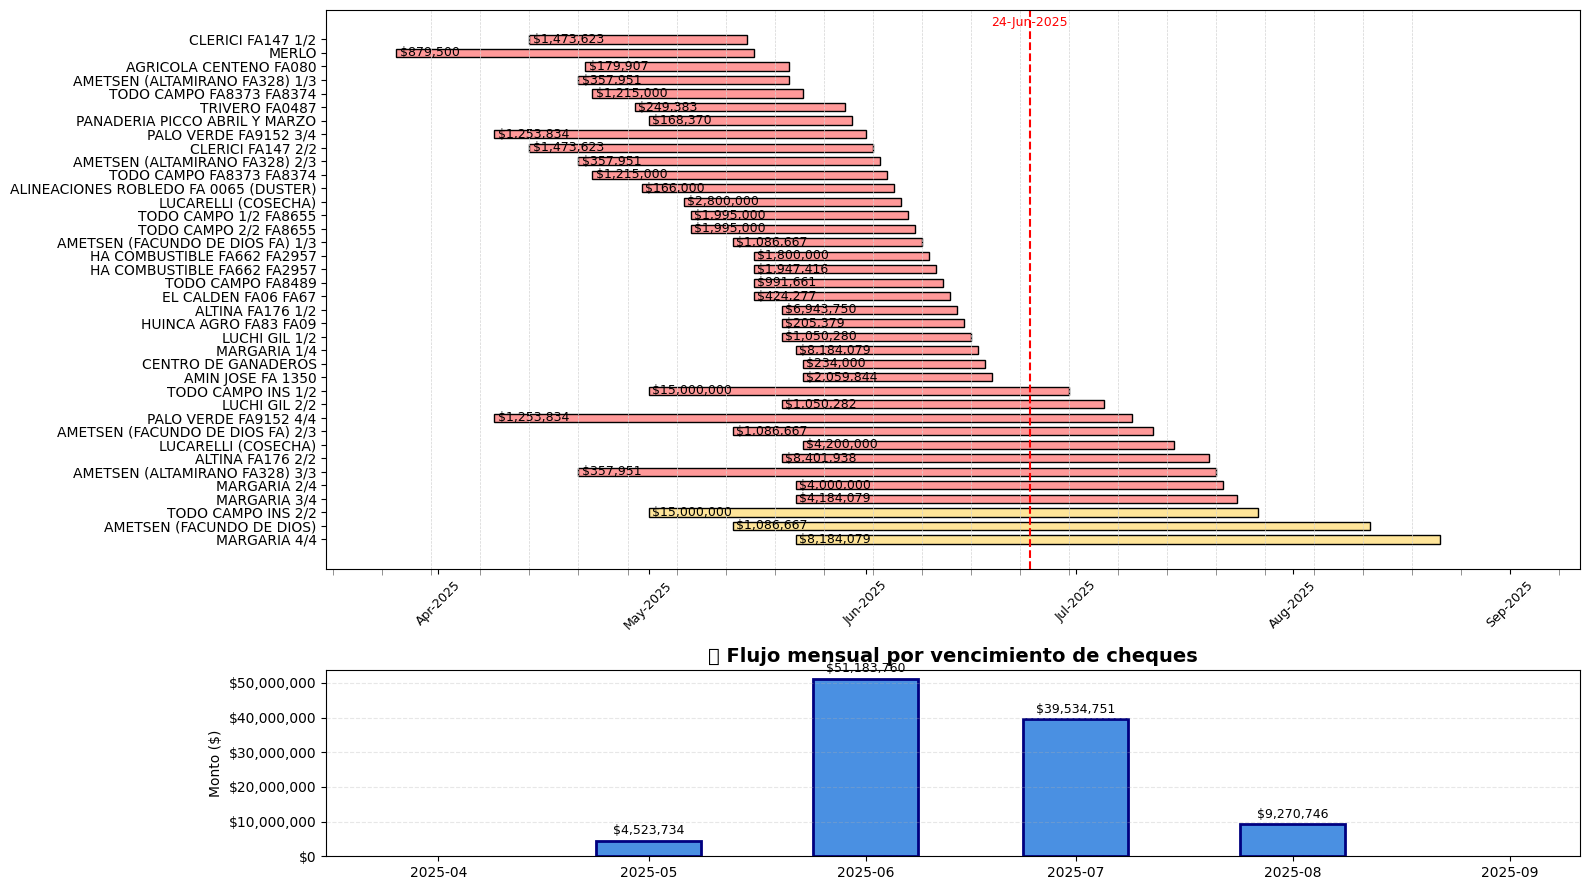

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from datetime import datetime, timedelta
import pandas as pd

# Datos cheques de mayo
cheques_mayo = [
    ("01/05/2025", "30/05/2025", "PANADERIA PICCO ABRIL Y MARZO", 168370.00),
    ("29/04/2025", "29/05/2025", "TRIVERO FA0487", 249382.72),
    ("23/04/2025", "23/05/2025", "TODO CAMPO FA8373 FA8374", 1215000.00),
    ("22/04/2025", "21/05/2025", "AGRICOLA CENTENO FA080", 179907.08),
    ("21/04/2025", "21/05/2025", "AMETSEN (ALTAMIRANO FA328) 1/3", 357951.00),
    ("14/04/2025", "15/05/2025", "CLERICI FA147 1/2", 1473622.75),
    ("26/03/2025", "16/05/2025", "MERLO", 879500.00),
]

# Datos cheques generales
cheques = [
    ("01/05/2025", "30/06/2025", "TODO CAMPO INS 1/2", 15000000.00),
    ("09/04/2025", "01/06/2025", "PALO VERDE FA9152 3/4", 1253833.94),
    ("14/04/2025", "02/06/2025", "CLERICI FA147 2/2", 1473622.75),
    ("21/04/2025", "03/06/2025", "AMETSEN (ALTAMIRANO FA328) 2/3", 357951.00),
    ("23/04/2025", "04/06/2025", "TODO CAMPO FA8373 FA8374", 1215000.00),
    ("30/04/2025", "05/06/2025", "ALINEACIONES ROBLEDO FA 0065 (DUSTER)", 166000.00),
    ("06/05/2025", "06/06/2025", "LUCARELLI (COSECHA)", 2800000.00),
    ("07/05/2025", "07/06/2025", "TODO CAMPO 1/2 FA8655", 1995000.00),
    ("07/05/2025", "08/06/2025", "TODO CAMPO 2/2 FA8655", 1995000.00),
    ("13/05/2025", "09/06/2025", "AMETSEN (FACUNDO DE DIOS FA) 1/3", 1086667.00),
    ("16/05/2025", "10/06/2025", "HA COMBUSTIBLE FA662 FA2957", 1800000.00),
    ("16/05/2025", "11/06/2025", "HA COMBUSTIBLE FA662 FA2957", 1947415.84),
    ("16/05/2025", "12/06/2025", "TODO CAMPO FA8489", 991660.66),
    ("16/05/2025", "13/06/2025", "EL CALDEN FA06 FA67", 424276.77),
    ("20/05/2025", "14/06/2025", "ALTINA FA176 1/2", 6943750.00),
    ("20/05/2025", "15/06/2025", "HUINCA AGRO FA83 FA09", 205379.35),
    ("20/05/2025", "16/06/2025", "LUCHI GIL 1/2", 1050280.00),
    ("22/05/2025", "17/06/2025", "MARGARIA 1/4", 8184079.33),
    ("23/05/2025", "18/06/2025", "CENTRO DE GANADEROS", 234000.00),
    ("23/05/2025", "19/06/2025", "AMIN JOSE FA 1350", 2059843.50),
]
cheques_julio_raw = [
    ("01/05/2025","27/07/2025","TODO CAMPO INS 2/2", 15000000.00),
    ("09/04/2025","09/07/2025","PALO VERDE FA9152 4/4", 1253833.94),
    ("21/04/2025","21/07/2025","AMETSEN (ALTAMIRANO FA328) 3/3", 357951.31),
    ("13/05/2025", "12/07/2025","AMETSEN (FACUNDO DE DIOS FA) 2/3", 1086667.00),
    ("20/05/2025", "20/07/2025","ALTINA FA176 2/2", 8401937.50),
    ("20/05/2025", "05/07/2025","LUCHI GIL 2/2", 1050282.00),
    ("22/05/2025", "22/07/2025","MARGARIA 2/4", 4000000.00),
    ("22/05/2025", "24/07/2025","MARGARIA 3/4", 4184079.33),
    ("23/05/2025", "15/07/2025","LUCARELLI (COSECHA)", 4200000.00),
]

cheques_agosto_raw = [
    ("13/05/2025","12/08/2025","AMETSEN (FACUNDO DE DIOS)", 1086667.00),
    ("22/05/2025","22/08/2025","MARGARIA 4/4", 8184079.33),
]

cheques_julio = [(e.strip(), p.strip(), b, m) for e, p, b, m in cheques_julio_raw]
cheques_agosto = [(e.strip(), p.strip(), b, m) for e, p, b, m in cheques_agosto_raw]

# Unir todos
todos_los_cheques = cheques_mayo + cheques + cheques_julio + cheques_agosto
df = pd.DataFrame(todos_los_cheques, columns=["emision", "pago", "beneficiario", "monto"])
df["inicio"] = pd.to_datetime(df["emision"], format="%d/%m/%Y")
df["fin"] = pd.to_datetime(df["pago"], format="%d/%m/%Y")
df["duracion"] = (df["fin"] - df["inicio"]).dt.days.clip(lower=1)

# Color por días hasta vencimiento
hoy = datetime.today()
df["dias_restantes"] = (df["fin"] - hoy).dt.days
def color_picker(dias): return '#ff9999' if dias <= 30 else '#ffe599' if dias <= 90 else '#b6d7a8'
df["color"] = df["dias_restantes"].apply(color_picker)

df = df.sort_values("fin").reset_index(drop=True)

# Gráfico
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9), gridspec_kw={'height_ratios': [3, 1]})
fig.patch.set_facecolor('white')

# Gráfico Gantt
for i, row in df.iterrows():
    ax1.barh(i, row["duracion"], left=row["inicio"], height=0.6, color=row["color"], edgecolor='black')
    ax1.text(row["inicio"] + timedelta(days=0.5), i, f"${row['monto']:,.0f}", va='center', ha='left', fontsize=9)

ax1.axvline(hoy, color='red', linestyle='--', linewidth=1.5)
ax1.text(hoy, -1, hoy.strftime("%d-%b-%Y"), color='red', ha='center', fontsize=9)
ax1.set_yticks(range(len(df)))
ax1.set_yticklabels(df["beneficiario"])
ax1.invert_yaxis()
ax1.set_xlim(df["inicio"].min() - timedelta(days=10), df["fin"].max() + timedelta(days=20))

# Eje X: meses como principales, semanas como menores
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax1.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
ax1.tick_params(axis='x', which='major', rotation=45, labelsize=9)
ax1.tick_params(axis='x', which='minor', length=4, color='gray')

# Líneas por semana
for tick in mdates.WeekdayLocator(byweekday=mdates.MO).tick_values(df["inicio"].min(), df["fin"].max()):
    ax1.axvline(tick, color='lightgray', linestyle='--', linewidth=0.5)

# Gráfico de flujo mensual
df["mes_pago"] = df["fin"].dt.to_period("M").dt.to_timestamp()
flujo_mensual = df.groupby("mes_pago")["monto"].sum().sort_index()

# Mostrar los valores arriba de cada barra
for i, (fecha, monto) in enumerate(flujo_mensual.items()):
    ax2.text(fecha, monto + flujo_mensual.max() * 0.02,  # un poquito arriba del tope
             f"${monto:,.0f}",
             ha='center', va='bottom', fontsize=9, color='black')

ax2.bar(flujo_mensual.index, flujo_mensual.values, width=15, color='#4a90e2', edgecolor='navy', linewidth=2)
ax2.set_title("💰 Flujo mensual por vencimiento de cheques", fontsize=14, weight='bold')
ax2.set_ylabel("Monto ($)")
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax2.grid(axis='y', linestyle='--', alpha=0.3)
ax2.set_xlim(df["inicio"].min() - timedelta(days=10), df["fin"].max() + timedelta(days=20))

# Mostrar sumatoria
print("📊 Sumatoria mensual de montos por vencimiento:")
print(flujo_mensual)

plt.tight_layout()
plt.show()